In this lecture, we study nonnegative matrix factorization (NMF), which belongs to the family of unsupervised learning algorithms. NMF is a matrix factorization method where we constrain the matrices to be nonnegative. The goal is dimensional reduction. 

Before we delve into nonnegative matrix factorization, let's review the existing methods of matrix factorization in introductory linear algebra classes. Let V represent a generic data matrix. In the past, we have encountered many types of matrix factorizations. Examples include the following: 1) **LU factorization**, which decomposes a square matrix into a lower and an upper triangular matrix (V=LU). The product sometimes includes a permutation matrix as well. A **permutation matrix** is a square binary matrix that has exactly one entry of 1 in each row and each column and 0s elsewhere. Each such matrix, say P, represents a permutation of m elements and, when used to multiply another matrix, say A, results in permuting the rows (when pre-multiplying, to form PA) or columns (when post-multiplying, to form AP) of the matrix A. The LU decomposition is essentially Gaussian elimination, and is often used to simplify the solving of systems of linear equations, such as finding the coefficients in a linear regression, as well as in calculating the determinant and inverse of a matrix. In Python implementations, the decomposition is given by V=PLU. 2) **QR factorization**, which decomposes a generic (not necessarily a square matrix) V into two parts V=QR, where Q is a square matrix and R is an upper triangle matrix. The QR decomposition is found using an iterative numerical method that can fail for those matrices that cannot be decomposed, or decomposed easily. Like the LU decomposition, the QR decomposition is often used to solve systems of linear equations, although is not limited to square matrices. 3) **Cholesky decomposition**, which is for square Hermitian matrices where all eigenvalues are greater than zero, the so-called positive definite matrices. The Cholesky decomposition is used widely in numerical analysis, where V=LL' (where L' stands for the conjugate transposed matrix of the original lower triangular matrix L). It can also be written as product of the upper triangular matrix in a similar fashion such that V=U'U where U is an upper triangular matrix and U' is its conjugate transposed matrix. All of these 3 types of factorization can be achieved in Python. 

NMF is similar in the sense that now we are interested in factoring the data matrix V into two matrices so that approximately, V=WH where W is a nonnegative weight matrix and H is non-negative as well. The rationale here is that we can decompose the data points into an overlay of certain components, each with a nonnegative weight. And then hopefully we can assign some meaning to that weight so that the result of the dimensional reduction may have a natural interpretation. We will cover the algorithms of NMF based on the manuscript "Algorithms for Non-negative Matrix Factorization" by Lee and Seung.

Before we jump onto NMF, let's review LU, QR and Cholesky decomposition first. All of these can be done using Python. Standard matrix multiplication is completed through np.dot() method:

In [51]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import functools as ft
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
V = np.array([[1,3,4],[2,1,3],[4,1,2]])
P, L, U = la.lu(V) # P is a permutation matrix
print('original matrix V:\n', V, '\n')
print('L=\n',L,'\n')
print('U=\n',U,'\n')
print('LU=\n',np.dot(L, U),'\n')
print('V=PLU:\n', ft.reduce(np.dot, [P,L,U]))

original matrix V:
 [[1 3 4]
 [2 1 3]
 [4 1 2]] 

L=
 [[1.         0.         0.        ]
 [0.25       1.         0.        ]
 [0.5        0.18181818 1.        ]] 

U=
 [[4.         1.         2.        ]
 [0.         2.75       3.5       ]
 [0.         0.         1.36363636]] 

LU=
 [[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

V=PLU:
 [[1. 3. 4.]
 [2. 1. 3.]
 [4. 1. 2.]]


In [4]:
V = np.array([[1,3,4],[2,1,3],[4,1,2],[0,0,1]])
Q,R = la.qr(V)
print(Q,'\n')
print(R,'\n')
print(np.dot(Q,R))

[[-0.21821789  0.96214047 -0.12649111  0.10327956]
 [-0.43643578  0.05345225  0.69570109 -0.56803756]
 [-0.87287156 -0.26726124 -0.31622777  0.25819889]
 [-0.          0.          0.63245553  0.77459667]] 

[[-4.58257569 -1.96396101 -3.92792202]
 [ 0.          2.67261242  3.47439614]
 [ 0.          0.          1.58113883]
 [ 0.          0.          0.        ]] 

[[1. 3. 4.]
 [2. 1. 3.]
 [4. 1. 2.]
 [0. 0. 1.]]


In [5]:
V= np.array([[1,3,5],[3,13,23],[5,23,42]])
L = la.cholesky(V)
print(L,'\n')
print(np.dot(L.T, L))

[[1. 3. 5.]
 [0. 2. 4.]
 [0. 0. 1.]] 

[[ 1.  3.  5.]
 [ 3. 13. 23.]
 [ 5. 23. 42.]]


We now discuss the origin of NMF due to Lee and Seung (1999) "Learning the parts of objects by non-negative matrix factorization" in the journal _NATURE_ . The motivation for this really comes from neural network models. They argue that NMF is able to learn part of faces and semantic features of texts. This is in contrast to other methods such as PCA or vector quantization(VQ) that learn holistic, non-parts-based representations. The non-negative constraints of NMF lead to a part-based representation because they allow only additive, not subtractive combinations. 

What does it mean to say the learning is non-parts based? Here we give a classicl example of NMF and then compare the results with VQ and PCA. Intuitively speaking, NMF is suited for tasks where the underlying factors can be interpreted as nonnegative. Compared to the classical PCA, we know that PCA can create factors that can be both positive and negative. So using an example from decomposing facial pictures, let's compare these two methods. We can see that in the following image, the components (bases) we calculated with PCA on the left and the weights corresponding to a single image on the right are displayed below. Red represents negative values:

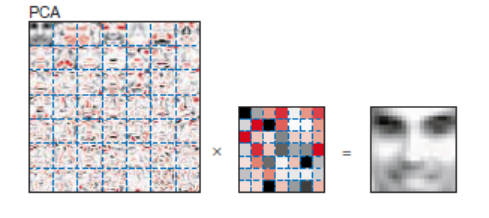

In [6]:
from IPython.display import display, Image
display(Image(filename='PCA and facial.PNG'))

We see that using PCA, the above picture is hard to interpret. Now using NMF below, we can see that some of the components look like parts of a nose or parts of an eye. We can consider each face to be an overlay of several components. This means we can interpret the decomposition of a face as having a certain weight of a certain nose type, a certain amount of some eye type, etc.:

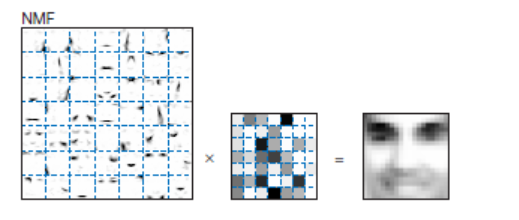

In [7]:
from IPython.display import display, Image
display(Image(filename='NMF and facial.PNG'))

Applying VQ is similar to applying to PCA, also hard to interpret in some aspect:

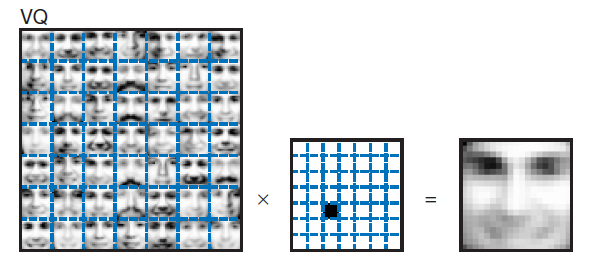

In [8]:
from IPython.display import display, Image
display(Image(filename='VQ and facial.PNG'))

Why is this happening? To start with, all 3 methods learn to represent a face as a linear combination of basis images, but with qualitatively different results. VQ discovers a basis consisting of prototypes, each of which is a whole face. The basis images for PCA are 'eigenfaces', some of which resemble distorted versions of a whole face. The NMF basis is radically different: its images are localized features that correspond better with intuitive notions of the parts of faces. 

What explains these differences in these 3 methods? To answer this question, we can treat the image database as a matrix V, each column of which contains nonnegative pixel values of one of the many facial images. Then all three methods intend to construct approximate factorizations of the form V=:WH. Columns of W are called basis images. Each column of H is called an encoding and is in 1-1 correspondence with a face in V. An encoding consists of the coefficients by which a face is represented with a linear combination of basis images. The product WH can be regarded as a compressed form of the data in V (dimensionality reduced).

The differences between PCA, VQ and NMF arise from different constraints imposed on the matrix factors W and H. In VQ, each column of H is constrained to be a **unary vector** (or elementary vector) in the form of (1,0,0,...0) or (0,0,...1,0,0) etc. (one element equal to 1 and the rest are all zeros). That is to say, every face (column of V) is approximated by a single basis image (column of W) in the factorization. Such a unary encoding for a particular face generates prototypical faces. In comparison, PCA constraints the columns of W to be orthonormal and the rows of H to be orthogonal to each other. This relaxes the unary constraints of VQ, allowing a distributed representation in which each face is approximated by a linear combination of all the basis images, or eigenfaces. Even though eigenfaces have a statistical interpretation as the directions of largest variance, many of them do not have an obvious visual interpretation. NMF does not allow negative entries in W and H and only additive combinations are allowed (so no subtraction). In addition, the NMF basis and encodings contain a large fraction of vanishing coefficients, so both the basis images and image encodings are sparse. The basis images are sparse because they are non-global and contain several versions of mouths, noses and other facial parts, where the various versions are in different
locations or forms. The variability of a whole face is generated by combining these different parts. Although all parts are used by at least one face, any given face does not use all the available parts. This results in a sparsely distributed image encoding in constrast with the other 2 methods aforementioned. 

It is helpful to visualize the dependencies between image pixels and encoding variables in the form of the network shown below. Suppose we have a data matrix V that needs to be factored into V=WH. The top layer of nodes represents an encoding h's (column of H), and the bottom layer an image v's (column of V). The matrix element $w_{ij}$ quantifies the amount of influence that the _ith_ encoding variable ha has on the _ith_ image pixel $v_{i}$. A single encoding variable influences multiple image pixels, owing to the fan-out of connections from the encoding variable. Because of the nonnegativity of $w_{ij}$, this influence is restricted to coactivation of image pixels. Intuitively, a parts-based representation should be learnable from observations of coactivation in V, as the image pixels belonging to the same part of the face are coactivated when that part is present. NMF learns by adapting $w_{ij}$ to generate the appropriate coactivations.

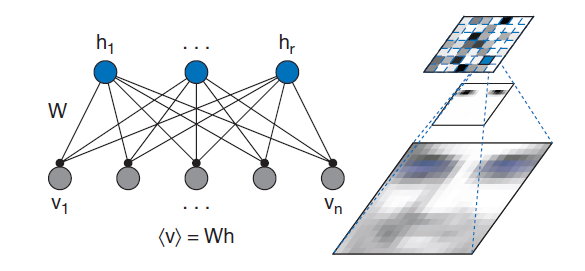

In [9]:
from IPython.display import display, Image
display(Image(filename='NMF and neural network.PNG'))

The preceding view on NMF tells us that we can treat NMF as a method to model the generation of directly observable visible variables V from hidden variables H. Each hidden variable coactivates a subset of visible variables, or "parts". Activation of a constellation of hidden variables combines these parts additively to generate a whole. A natural extension of NMF thus can be attributed to topic modeling in NLP projects. Imagine if you wanted to decompose a term-document matrix, where each column represented a document, and each element in the document represented the weight of a certain word (the weight might be the raw count or the TF-IDF weighted count or some other encoding scheme and those details are not important here). What happens when we decompose this into two matrices? Imagine if the documents come from news articles. The word "eat" would be likely to appear in food-related articles, and therefore co-occur with words like "tasty" and "food". Therefore, these words would probably be grouped together into a "food" component vector, and each article would have a certain weight of the "food" topic. Therefore, an NMF decomposition of the term-document matrix would yield components that could be considered "topics", and decompose each document into a weighted sum of topics. This is called topic modeling and is an important application of NMF.

Note that this interpretation would not be possible with other decomposition methods. We cannot interpret what it means to have a negative weight of the food topic. This is another example where the underlying components (topics) and their weights should be non-negative. Note also that NMF naturally produces sparse representations. This makes sense in the case of topic modeling: documents generally do not contain a large number of topics.

We now compare the 3 methods for topic modeling. Suppose a a corpus of documents is summarized by a data matrix V where $v_{ij}$ is the number of times the _ith_ word in the vocabulary appears in the _jth_ document. These word counts can be regarded as a set of visible variables and modelled as being generated from an underlying set of hidden variables. Applications of VQ, PCA or NMF involve finding approximate factorization of V into WH which can be interpreted as features set and hidden variables. In the VQ factorization, a single hidden variable is active for each document. If the same hidden variable is active for a group of documents, they are semantically related, because they have similar frequencies of word occurrence. So the hidden variables are called semantic variables and VQ is accordingly used for automatic semantic indexing of documents by topic. Each column of W, or semantic feature, consists of the word frequencies for the corresponding semantic variable. VQ allows only one semantic variables to be active, which prevents more than one topic from being attributed to a document. In contrast, PCA would seem to be a solution as it allows activation of multiple semantic variables. But because of the lack of constraints on the positivity of the weight, PCA generates results that are hard to interpret. This is where NMF kicks in: intuitively it makes more sense for each document to be associated with some small subset of a large array of topics, rather than just one topic or all the topics (thus the concept of sparsity kicks in as well).

In addition to grouping semantically related words together into semantic features, the algorithm uses context to differentiate
between multiple meanings of the same word. For example, the word "lead" appears with high frequency in two semantic features: it occurs with "metal", "copper" and "steel" in one, whereas it appears with "person", "rules" and "law" in the other. This
demonstrates that NMF can deal with the **polysemy** (the coexistence of many possible meanings for a word or phrase) of "lead" by disambiguating two of its meanings in the corpus of documents. Although NMF is successful in learning facial parts and semantic topics, this success does not imply that the method can learn parts from any database, such as images of objects viewed from extremely different viewpoints, or highly articulated objects. Learning parts for these complex cases is likely to require fully hierarchical models with multiple levels of hidden variables, instead of the single level in NMF. Although non-negativity constraints may help such models to learn parts-based representations, we do not claim that they are sufficient in themselves. Also, NMF does not learn anything about the "syntactic" relationships between parts. NMF assumes that the hidden variables are non-negative, but makes no further assumptions about their statistical dependencies. So you can treat NMF as a very simple version of shallow neural nets model with constraints from a heuristic angle. 

Topic modeling itself is a big topic. There are other algorithms that deal with it specifically in NLP, such as using latent Dirilecht allocation models (LDA). We won't go too deep here, but just from a big picture perspective, LDA is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.

Now let's see a generic example of NMF. The NMF() method is best used with the fit_transform() method, which returns the matrix W. The matrix H is stored into the fitted model in the "components_" attribute. The method transform() will decompose a new matrix basd on these stored components:

In [14]:
V=np.array([[1,1],[2,1],[3,1.2],[4,1],[5,0.8],[6,1]])
print(V)
np.shape(V) # 6*2 matrix

[[1.  1. ]
 [2.  1. ]
 [3.  1.2]
 [4.  1. ]
 [5.  0.8]
 [6.  1. ]]


(6, 2)

In [15]:
model=NMF(n_components=2,init='random',random_state=0)
W=model.fit_transform(V)
H=model.components_
V_new=np.array([[1,0],[1,6.1],[1,0],[1,4],[3.2,1],[0,4]])
W_new=model.transform(V_new)

In [21]:
print('W:\n',W)
print('H:\n',H)
print('V-WH:\n', V-np.dot(W,H))

W:
 [[0.         0.46880684]
 [0.55699523 0.3894146 ]
 [1.00331638 0.41925352]
 [1.6733999  0.22926926]
 [2.34349311 0.03927954]
 [2.78981512 0.06911798]]
H:
 [[2.09783018 0.30560234]
 [2.13443044 2.13171694]]
V-WH:
 [[-6.35579822e-04  6.36528773e-04]
 [ 3.40231372e-04 -3.40739354e-04]
 [ 3.45147253e-04 -3.45662574e-04]
 [ 1.31898319e-04 -1.32095249e-04]
 [-9.00218123e-05  9.01562192e-05]
 [-8.58722020e-05  8.60004133e-05]]


Computationally, NMF is obtained through optimizing the distance between the two matrix V and WH. The most widely used distance function is the squared Frobenius norm, which is an obvious extension of the Euclidean norm to matrices: $$d_{Frob}(X,Y)=0.5||X-Y||_{Frob}^{2}=\frac{1}{2}\sum_{i,j}(X_{ij}-Y_{ij})^{2}$$

This is not the only matrix norm one can use. For example, the Kullback-Leibler (KL) divergence or the Itakura-Saito divergence are two other common norms used. All these 3 norms are special cases of the beta-divergence family. The online documentation has more information (see the section on _NMF with a beta-divergence_):

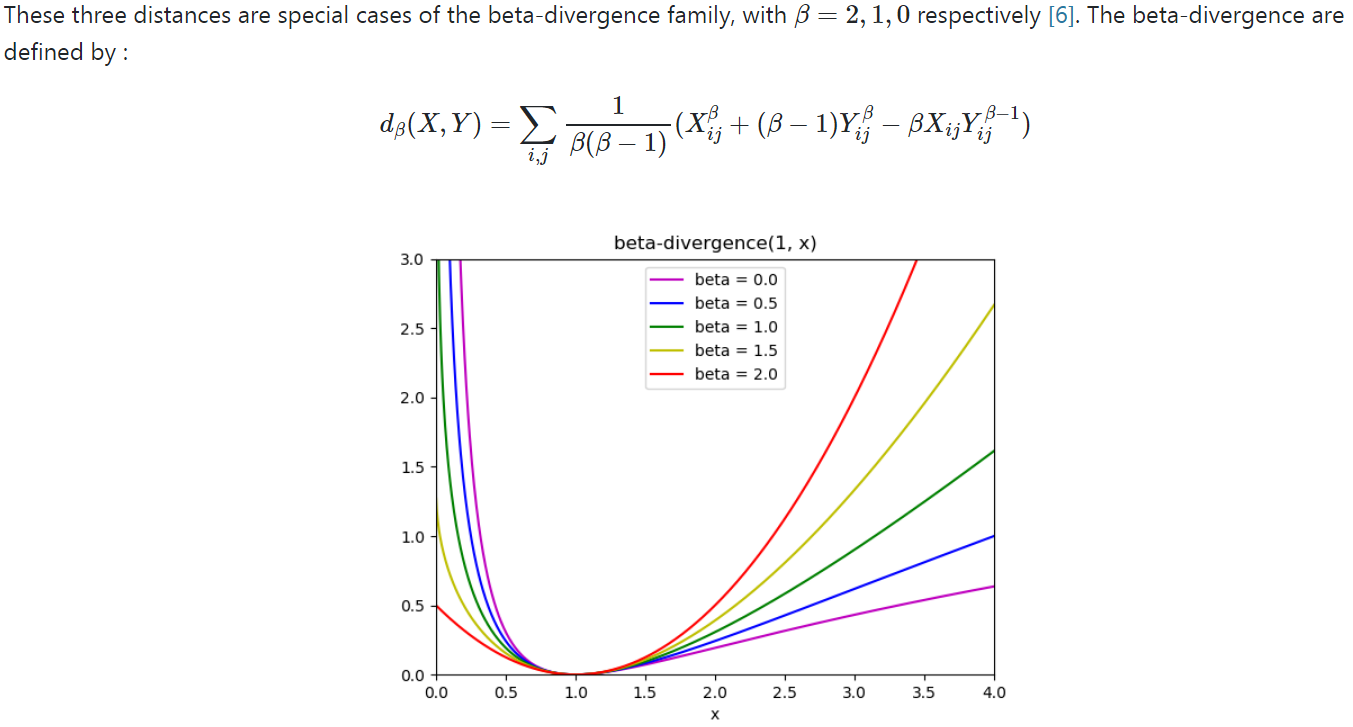

In [25]:
from IPython.display import display, Image
display(Image(filename='matrix norms for NMF.PNG'))

The 'init' attribute determines the initialization method used, which has a great impact on teh performance of the method. NMF() implements the method Nonnegative Double Singular Value Decomposition (NNDSVD), which is based on two SVD processes, one approximating the data matrix, and the other aprxoimatnig the positive sections of the resulting partial SVD factors utilizing an algebraic property of unit rank matrices. The basic NNDSVD algorithm is better fit for sparse factorization. Its variants NNDSVD-a (in which all zeros are set equal to the mean of all elements of the data), and NNDSVD-ar (in which the zeros are set to random perturbations less than the mean of the data divided by 100) are recommended in the dense case. Note also that the "Multiplicative Update"("mu") solver cannot update zeros present in the initialization, so it leads to poorer results when used jointly with the basic NNDSVD algorithm which introduces a lot of zeros; in this case, NNDSVD-a or NNDSVD-ar should be preferred.

In NMF, L1 and L2 priors can be added to the loss function in order to regularize the model. The L2 uses the Forbenius norm whereas the L1 prior uses an elementwise L1 norm. The regularization is similar to elastic net. The online documentation has more information. 

Next we demonstrate an example of topic modeling using NMF on a corpus of documents and extract additive models of the topic structure of the corpus. The output is a list of topics, each represented as a list of terms (weights are not shown). Here, NMF is applied with two different objective functions: the Frobenius norm, and the generalized Kullback-Leibler divergence. The latter is equivalent to **probabilistic latent semantic indexing**.

The default parameters (n_samples, n_features, n_components) should make the example runnable in a couple of tens of seconds. You can try to increase the dimensions of the problem, but be aware that the time complexity is polynomial in NMF. In LDA, the time complexity is proportional to (n_samples * iterations):

In [58]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

Here we intend to load 20 newsgroups dataset and vectorize it. We use a few heuristics to filter out useless terms early on, such as headers, footers, and quoted replies, and common English words. Words occuring in only one document or in at least 95% of the documents are both removed (see the 'max_df' argument in the TfidfVectorizer() function). The data we loaded through the fetch_20newsgropus is a special class called 'sklearn.utils.Bunch'. To get its attribute, you can use the 'tab' key to explore what type of attribute it contains, for more details about the dataset, the data.DESCR command below shall tell us all we need to understand this dataset:

In [55]:
print("Loading dataset...")
data = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
print(type(data))
print(data.DESCR)

Loading dataset...
<class 'sklearn.utils.Bunch'>
.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    S

Next we take a sample of the data (n_samples=2000) and then extract word features. Here we use the Bag of Words models. In this model, a corpus of documents can be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus. The key function here is TfidfVectorizer(). We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or **Bag of n-grams** representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

Notice that the argument 'max_features' indicates the maximum feature of the vectorizer. If not set to be None (default), it builds a vocabulary that only considers the top max_features ordered by term frequency across the corpus. The 'min_df' can be a float in range [0,1] or integer (default=1). When building the vocabulary, this parameter tells us to ignore terms that have a document frequency strictly lower than the given threshold. If we set it to be a float (between 0 and 1), the parameter represents a proportion of documents. The TfidfVectorizer() function converts a collection of raw documents to a matrix of TF-IDF features. This function is equivalent to CountVectorizer() followed by TfidfTransformer().

In [57]:
data_samples = data.data[:n_samples] # taking the sample of the original data

print("Now extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features, 
                                   stop_words='english') # the stop_words argument should always be english by default

t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples) # Using TF-IDF features for NMF
print("Vectorization of tokens: done in %0.3fs." % (time() - t0))
print("The object type of 'tfidf':", type(tfidf))

Taking the sample of the original data: done in 41.574s.
Now extracting tf-idf features for NMF...
Vectorization of tokens: done in 0.456s.
The object type of 'tfidf': <class 'scipy.sparse.csr.csr_matrix'>


Now let's do two exercises: one using standard Frobenius norm and one using the Kullback-Leibler divergence. We also create a function print_top_words for display purposes:

In [64]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_): # model.components_ is basically the entries of the matrix H
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [65]:
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=0.1, l1_ratio=0.5).fit(tfidf) # fiting the NMF model
print("done in %0.3fs." % (time() - t0))


print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.299s.

Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know time good make way really say right ve want did ll new use years
Topic #1: windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2: god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5: edu soon com send university internet mit ftp mail cc pub article information hope program mac email home contact blood
Topic #6: file problem files format win sound ftp pub read save sit

In [66]:
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 2.175s.

Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: just people don like did know make really right think say things time look way didn ve course probably good
Topic #1: help thanks windows know hi need using does looking anybody appreciated card mail software use info email ftp available pc
Topic #2: does god believe know mean true christians read point jesus christian church come people fact says religion say agree bible
Topic #3: know thanks mail interested like new just bike email edu advance want contact really list heard com post hear information
Topic #4: 10 new 30 12 20 50 11 sale 16 15 time 14 old power ago good 100 great offer cost
Topic #5: number 1993 data subject government new numbers provide information space following com research include large note group major time talk
Topic #6: edu problem file com remember 

   References:
   - https://www.cs.rochester.edu/u/jliu/CSC-576/NMF-tutorial.pdf
   - https://mlexplained.com/2017/12/28/a-practical-introduction-to-nmf-nonnegative-matrix-factorization/
   - https://scikit-learn.org/stable/modules/decomposition.html#nmf 
   - https://machinelearningmastery.com/introduction-to-matrix-decompositions-for-machine-learning/
   - https://www.kdnuggets.com/2016/07/text-mining-101-topic-modeling.html 
   - https://blog.acolyer.org/2019/02/18/the-why-and-how-of-nonnegative-matrix-factorization/
   - https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction